In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
%matplotlib inline

In [2]:
yelp_raw = pd.read_csv('yelp_labelled.txt', sep='\t', header=None, names=['reviews', 'boolean'])
yelp_raw.head()

,reviews,boolean
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
yelp_raw.describe(include='all')

,reviews,boolean
count,1000,1000.00000
unique,996,NaN
top,I won't be back.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [4]:
yelp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
reviews    1000 non-null object
boolean    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


pd.set_option('display.max_columns',1000)

In [5]:
yelp_raw['reviews'].astype('str')

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
13     I tried the Cape Cod ravoli, chicken,with cran...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
16                                   Highly recommended.
17                Waitress was 

In [6]:
keywords = ['love', 'good', 'ever', 'great', 'well', 'like', 'recommended', 'delicious', 'amazing', 'performed', 'back', 'friendly', 'exellent']

for key in keywords:
    yelp_raw[str(key)] = yelp_raw.reviews.str.contains(str(key), case=False) & ~yelp_raw.reviews.str.contains('not', case=False) & ~yelp_raw.reviews.str.contains('worst', case=False)

pd.set_option('display.max_colwidth',1000)

In [7]:
yelp_raw

,reviews,boolean,love,good,ever,great,well,like,recommended,delicious,amazing,performed,back,friendly,exellent
0,Wow... Loved this place.,1,True,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,True,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,True,False,False,False,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,0,False,False,False,False,False,True,False,False,False,False,False,False,False
8,The fries were great too.,1,False,False,False,True,False,False,False,False,False,False,False,False,False
9,A great touch.,1,False,False,False,True,False,False,False,False,False,False,False,False,False


In [8]:
yelp_corr = yelp_raw.corr()

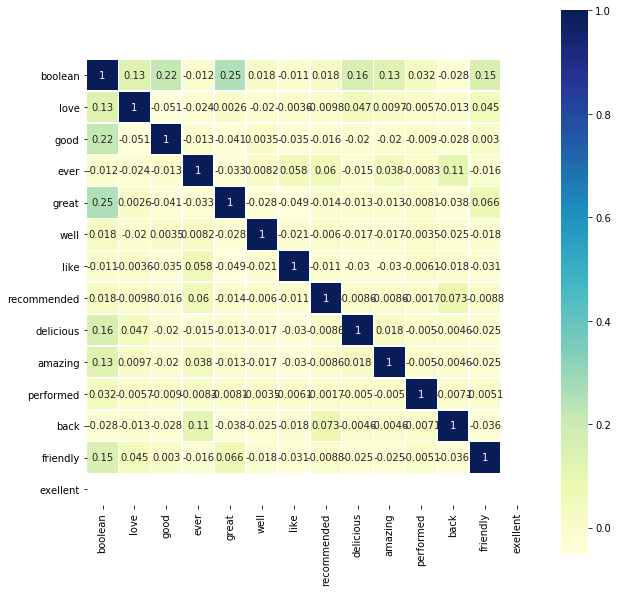

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(yelp_corr, square=True, linewidths=0.5, annot=True, cmap='YlGnBu')
plt.show()

In [10]:
yelp_raw.drop('reviews', axis=1, inplace=True)

In [11]:
yelp_raw.head()

,boolean,love,good,ever,great,well,like,recommended,delicious,amazing,performed,back,friendly,exellent
0,1,True,False,False,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,True,False,False,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,True,False,False,False,False,False,False,False,False,False


In [12]:
data = yelp_raw[keywords]
target = yelp_raw['boolean']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 308


Let's calculate the accuracy of my model

In [13]:
print("The accuracy of this model is {}%".format(round(((target == y_pred).sum() / data.shape[0])*100), 2))

The accuracy of this model is 69.0%


Now, Let's build confusion matrix and calculate sensitivity and specificity.

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target, y_pred)
cm

array([[485,  15],
       [293, 207]])

Check out the sensitivity and specificity

In [18]:
cm_sense = cm[1][1] / cm[1].sum()
print('The Sensitivity of my model is {}%'.format(cm_sense*100))

The Sensitivity of my model is 41.4%


In [19]:
cm_spec = cm[0][0] / cm[0].sum()
print('The Specificity of my model is {}%'.format(cm_spec*100))

The Specificity of my model is 97.0%
